# <center> Machine Learning </center>
# <center> How implement a simple Neural Network with Keras </center>

# 1. Introduction about Iris Flower 

<p style="text-align: justify;">The Iris Flower Dataset, also called Fisher’s Iris, is a dataset introduced by Ronald Fisher, a British statistician, and biologist, with several contributions to science. Ronald Fisher has well known worldwide for his paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It was in this paper that Ronald Fisher introduced the Iris flower dataset.</p>

<p style="text-align: justify;">The iris database consists of 50 samples distributed among three different species of iris. Each of these samples has specific characteristics, which allows them to be classified into three categories: Iris Setosa, Iris Virginica, and Iris versicolor. In this tutorial, we will use multilayer perceptron to separate and classify the iris samples.</p>

- The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor).

- Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters.

- Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

For this example, we will implement a Neural Network with Keras. 

### Complete the missing parts!

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>


## Some Python Libraries and load of data

<p style="text-align: justify;">In the first place, Let's define some libraries to help us in the manipulation the data set, such as `numpy`, `matplotlib`, and `scikit-learn`. Then load data from scikit-learn dataset library</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris_data = load_iris()

## An analysis about the Iris Flower Dataset


In [ ]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Create the X matrix and the y target vector from iris_data

In [ ]:
Y = iris_data.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = iris_data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Separate the dataset in Training and Test
To separate by a random procedure use the scikit-learn procedure **train_test_split**. See on 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Choose Test dimension = 30% and stratify with respect the target

In [ ]:
from sklearn.model_selection import train_test_split

# Complete this cell!
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(105, 4) (45, 4) (105,) (45,)


###Why I have to split the dataset in training and test? please justify this choice...

Because after creating the model, we must have data to measure the accuracy of the model. With the previous data, the accuracy and quality of the model can not be measured because the model was made using them and does not show real accuracy. Therefore, we must separate a number of data from the original data so that we can use them later to identify the quality and accuracy of the predicting model.







## Transform the target  y (that is a categorical variable) as a dummy matrix, both for training and test


In [ ]:
from tensorflow.keras.utils import to_categorical
Ytrain = to_categorical(Y_train)
Ytest = to_categorical(Y_test)
Ytrain


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

## Construct the Neural Network

### Neural Network:

By mimicking how the human brain works, neural networks recognize relationships in data by using a series of algorithms. 
Artificial neural networks, neural networks, or neural nets are a type of algorithm for learning. It is a computational learning system that uses a network of functions to convert input data into output data, usually in a different form.
Adaptive neural networks generate the best possible result without needing to rethink the output criteria in response to changing input.

now you have the train data and test data ready, so you have to apply the model as explained in the software slides.

### Architecture
You have to define the **architecture** of the model with 3 hidden layers, with respectively 40, 20, 20 neurons. 

Choose 'relu' for the activation function of hidden layers

Remember that we have 4 variables in the input and 3 classes in the output

Remember also that with a categorical target the activation funcion of the output layer must be 'softmax'

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# complete ths cell!

inp = Input((4))
x= Dense(20, activation = "relu")(inp)
x= Dense(10, activation = "relu")(x)
x= Dense(10, activation = "relu")(x)
out = Dense(3, activation = "softmax")(x)

model = Model(inp, out)

model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable params: 0
_________________________________________________________________


### Compilation of the model
(see the slide 6 of the software slides)

In [ ]:
opt= tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

In [ ]:
# complete this cell!

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics="accuracy")

### Model fitting


In [ ]:
# complete this cell

hist = model.fit(X_train, Ytrain, batch_size=5, epochs=150, validation_data= (X_test, Ytest))

Epoch 1/150
21/21 [==============================] - 0s 9ms/step - loss: 0.1078 - accuracy: 0.9619 - val_loss: 0.0682 - val_accuracy: 0.9778
Epoch 2/150
21/21 [==============================] - 0s 5ms/step - loss: 0.0513 - accuracy: 0.9810 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 3/150
21/21 [==============================] - 0s 6ms/step - loss: 0.0455 - accuracy: 0.9810 - val_loss: 0.0519 - val_accuracy: 0.9778
Epoch 4/150
21/21 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9524 - val_loss: 0.0681 - val_accuracy: 0.9778
Epoch 5/150
21/21 [==============================] - 0s 5ms/step - loss: 0.0701 - accuracy: 0.9714 - val_loss: 0.1596 - val_accuracy: 0.9333
Epoch 6/150
21/21 [==============================] - 0s 5ms/step - loss: 0.0591 - accuracy: 0.9714 - val_loss: 0.0639 - val_accuracy: 0.9778
Epoch 7/150
21/21 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9714 - val_loss: 0.1011 - val_accuracy: 0.9778
Epoch 8/150
2

### history of fitting

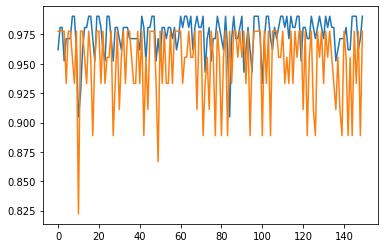

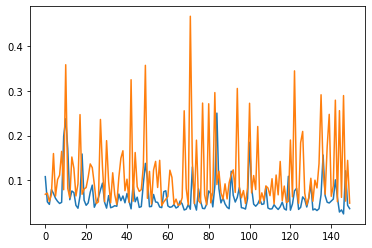

In [ ]:
# Plot training & validation accuracy values

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.show()

# Plot training & validation loss values

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

## Comment the results:
This test is designed to determine how well the model generalizes. Comparing neural network outputs to corresponding targets in the testing instances of the data set is what we do here.
The results show that the accuracy of this model is 0.9778 and the loss is 0.0483. This indicates how accurately the algorithm model evaluates the data. The loss measures the gap between the current output of the algorithm and its expected output, and a low value of the loss indicates the high accuracy of the model.


##  Final evaluation and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix #to compare the results of prediction with the original value
model.evaluate(X_test, Ytest)

2/2 [==============================] - 0s 8ms/step - loss: 0.0483 - accuracy: 0.9778


[0.04833148419857025, 0.9777777791023254]

In [ ]:
# complete this cell

yyy= model.predict(X_test, batch_size=5)
yyy



array([[2.2905262e-15, 4.9155665e-04, 9.9950838e-01],
       [1.2336335e-05, 9.9643552e-01, 3.5521176e-03],
       [3.8966493e-05, 4.7324294e-01, 5.2671814e-01],
       [1.8246412e-05, 9.9494678e-01, 5.0349296e-03],
       [1.3875118e-07, 8.8808551e-02, 9.1119134e-01],
       [4.0146288e-19, 4.0984571e-05, 9.9995899e-01],
       [1.6430918e-06, 9.9944395e-01, 5.5435154e-04],
       [3.7951162e-09, 9.9999666e-01, 3.2966370e-06],
       [1.0000000e+00, 9.6800212e-10, 8.1191629e-22],
       [5.4325923e-15, 6.2991196e-04, 9.9937016e-01],
       [1.0000000e+00, 5.3274008e-14, 7.5706703e-28],
       [1.0000000e+00, 2.4699003e-09, 1.1155395e-20],
       [6.6828113e-15, 6.6851248e-04, 9.9933147e-01],
       [1.0035892e-10, 1.0516714e-02, 9.8948330e-01],
       [1.0000000e+00, 8.5928507e-11, 3.6222445e-23],
       [3.4946659e-15, 5.5495888e-04, 9.9944502e-01],
       [5.2700166e-10, 9.9999988e-01, 1.5954345e-07],
       [1.0000000e+00, 1.4566882e-11, 3.3067444e-24],
       [1.0000000e+00, 5.383

In [ ]:
yyt= np.argmax(yyy, axis= 1)
yyt

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       1])

Using the confusion matrix, we can calculate the model's accuracy and error:
In the confusion matrix, the rows represent the targets (or real values) and the columns represent the corresponding outputs (or predictive values). The diagonal cells indicate correctly classified samples. The off-diagonal cells depict misclassified samples.
All but one of the testing instances are correctly classified here.

In [ ]:
confusion_matrix(Y_test, yyt)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])